<a href="https://colab.research.google.com/github/freddyfernandes/MNIST_CNN/blob/main/CNN_Model_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training a ***CNN Model*** to detect handwritten digits using the **MNIST Dataset**

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

##Data Loading and preprocessing

In [2]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one-hot encoding target val
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

##Pixel Scaling

In [3]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

##CNN Model Definition

In [4]:
def define_model():
	#CNN Model
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

##Model Evaluation with K-fold CV

In [5]:
# evaluate model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

##Performance plots and summary

In [6]:
# plot learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()


In [7]:
#summarize model performance
def summarize_performance(scores):
	# print accuracy
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box plot of score
	plt.boxplot(scores)
	plt.show()

##Combined Functions

In [26]:
#Combining functions into one
def run():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

> 98.267
> 98.217
> 98.425
> 98.483
> 98.417


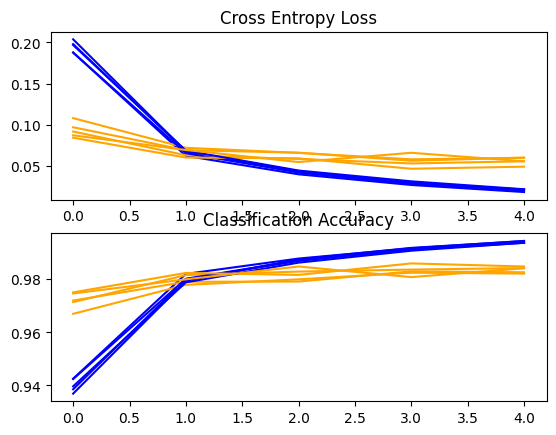

Accuracy: mean=98.362 std=0.102, n=5


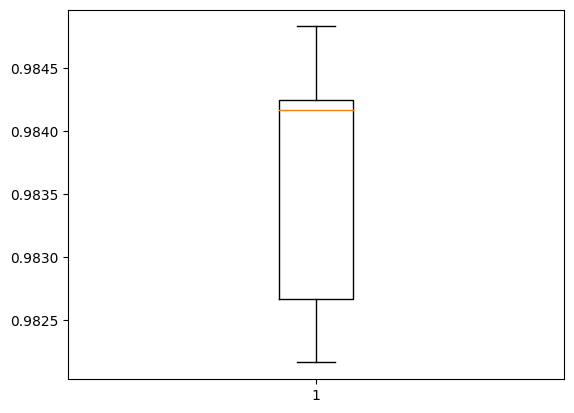

In [27]:
#Main implementation
run()

##Improving our CNN Model

In [8]:
# define cnn model
def define_model_imp():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [9]:
def evaluate_model_imp(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model_imp()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [14]:
def run_imp():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model_imp(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

> 98.433
> 98.717
> 98.617
> 99.050
> 98.975


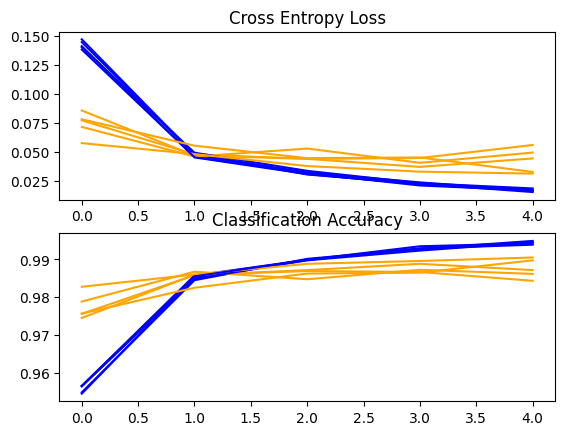

Accuracy: mean=98.758 std=0.228, n=5


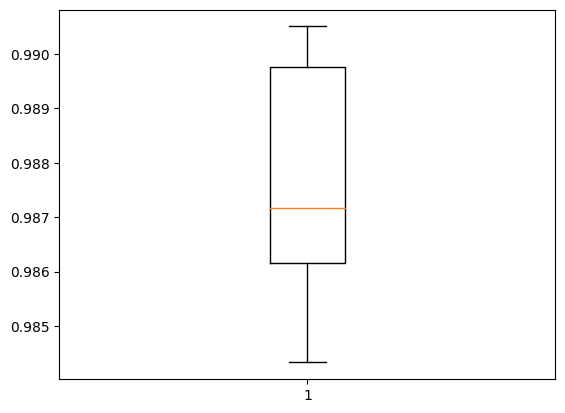

In [15]:
run_imp()

In [10]:
#Saving model
def save():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_imp()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)
	# save model
	model.save('final_model')
# entry point, run the test harness
save()

Epoch 1/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1257 - accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0194 - accuracy: 0.9941
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 80s 43m

In [11]:
from keras.models import load_model
#evaluating the model
def eval_model():
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # load model
 model = load_model('final_model')
 # evaluate model on test dataset
 _, acc = model.evaluate(testX, testY, verbose=1)
 print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
eval_model()

313/313 [==============================] - 4s 13ms/step - loss: 0.0352 - accuracy: 0.9918
> 99.180


In [12]:
#Prediction on new image
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

# load an image and predict the class
def run_example():
 # load the image
 img = load_image('sample_image.png')
 # load model
 model = load_model('final_model.h5')
 # predict the class
 predict_value = model.predict(img)
 digit = argmax(predict_value)
 print(digit)

#run the example
run_example()

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
7


Our model correctly predicted the image as 7!